In [1]:
import os
from pyspark.sql import SparkSession
from pyspark import  SparkContext
import pandas as pd
import numpy as np
from draw_candle_image import draw_candle_image
from draw_candle_image import *
import ta.trend
from ta import add_all_ta_features
from ta.utils import dropna
import ta
import ta.momentum

In [2]:
os.environ["JAVA_HOME"] = r'C:\Program Files\Java\jre-1.8'
os.environ["PYSPARK_PYTHON"] = "python" 

In [3]:
spark: SparkSession = SparkSession.builder.master("local").getOrCreate()

In [4]:
btc_df = pd.read_csv('./data/btc-2024-09-17-to-2024-11-03.csv')
btc_df["Date"] = pd.to_datetime(btc_df['Date'])

In [5]:
btc_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...,...
3695,2024-10-29 00:00:00+00:00,69910.046875,73577.210938,69729.914062,72720.492188,58541874402,0.0,0.0
3696,2024-10-30 00:00:00+00:00,72715.367188,72905.296875,71411.734375,72339.539062,40646637831,0.0,0.0
3697,2024-10-31 00:00:00+00:00,72335.046875,72662.312500,69590.500000,70215.187500,40627912076,0.0,0.0
3698,2024-11-01 00:00:00+00:00,70216.898438,71559.015625,68779.703125,69482.468750,49989795365,0.0,0.0


In [6]:
btc_df["Macd"] = ta.trend.macd(btc_df["Close"], fillna=True)
btc_df["Macd_signal"]= ta.trend.macd_signal(btc_df["Close"], fillna=True)
btc_df["Macd_histogram"] = ta.trend.macd_diff(btc_df["Close"], fillna=True)

In [7]:
btc_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Macd,Macd_signal,Macd_histogram
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0,0.000000,0.000000,0.000000
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0,-2.624024,-0.524805,-2.099219
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0,-7.014744,-1.822793,-5.191951
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0,-9.249402,-3.308115,-5.941288
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0,-11.699137,-4.986319,-6.712818
...,...,...,...,...,...,...,...,...,...,...,...
3695,2024-10-29 00:00:00+00:00,69910.046875,73577.210938,69729.914062,72720.492188,58541874402,0.0,0.0,1793.151267,1493.893830,299.257436
3696,2024-10-30 00:00:00+00:00,72715.367188,72905.296875,71411.734375,72339.539062,40646637831,0.0,0.0,1987.905567,1592.696178,395.209389
3697,2024-10-31 00:00:00+00:00,72335.046875,72662.312500,69590.500000,70215.187500,40627912076,0.0,0.0,1948.372708,1663.831484,284.541224
3698,2024-11-01 00:00:00+00:00,70216.898438,71559.015625,68779.703125,69482.468750,49989795365,0.0,0.0,1836.745495,1698.414286,138.331209


In [8]:
btc_df_spark = spark.createDataFrame(btc_df)
btc_stock = "btc_stock"
btc_df_spark.createOrReplaceTempView(btc_stock)

In [9]:
btc_stock_sub_1 = "btc_stock_sub_1"
btc_stock_include_previous_date = "btc_stock_include_previous_date"
bullish_engulfing = "bullish_engulfing"
btc_stock_sub_2 = "btc_stock_sub_2"
btc_stock_sub_3 = "btc_stock_sub_3"
bearish_engulfing = "bearish_engulfing"
btc_stock_sub_4 = "btc_stock_sub_4"
btc_stock_include_past_and_future_date = "btc_stock_include_past_and_future_date"
btc_stock_include_engulfing = "btc_stock_include_engulfing"
days_start_engulfing = "days_start_engulfing"
btc_stock_day_bearish_engulfing = "btc_stock_day_bearish_engulfing"
btc_stock_include_group_engulfing = "btc_stock_include_group_engulfing"
btc_stock_include_group_engulfing_sub_1 = "btc_stock_include_group_engulfing_sub_1"
start_and_end_date_of_group_engulfing = "start_and_end_date_of_group_engulfing"
btc_stock_include_harami = "btc_stock_include_harami"
btc_stock_include_tweezer = "btc_stock_include_tweezer"
btc_stock_include_morning_and_evening_star = "btc_stock_include_morning_and_evening_star"
btc_stock_include_next_3_day = "btc_stock_include_next_3_day"

Date = "Date"
Close = "Close"
Open = "Open"
High = "High"
Low = "Low"
Macd = "Macd"
Macd_signal = "Macd_signal"
Macd_histogram = "Macd_histogram"

Date_normalized = "Date_normalized"
Body_height = "Body_height"
Max_body_height_in_one_month_around = "Max_body_height_in_one_month_around"
Max_of_candle_body = "Max_of_candle_body"
Min_of_candle_body = "Min_of_candle_body"
Is_start_doji_candle = "Is_start_doji_candle"
Is_candle_up = "Is_candle_up"
Is_narrow_body_candle = "Is_narrow_body_candle"
Is_dragonfly_doji_candle = "Is_dragonfly_doji_candle"
Is_gravestone_doji_candle = "Is_gravestone_doji_candle"

Previous_date = "Previous_date"
Close_of_previous_day = "Close_of_previous_day"
Open_of_previous_day = "Open_of_previous_day"
High_of_previous_day = "High_of_previous_day"
Low_of_previous_day = "Low_of_previous_day"
Is_previous_day_candle_up = "Is_previous_day_candle_up"
Body_height_of_previous_day = "Body_height_of_previous_day"
Is_previous_day_start_doji_candle = "Is_previous_day_start_doji_candle"
Max_of_candle_body_of_previous_day = "Max_of_candle_body_of_previous_day"
Min_of_candle_body_of_previous_day = "Min_of_candle_body_of_previous_day"

Next_date = "Next_date"
Close_of_next_day = "Close_of_next_day"
Open_of_next_day = "Open_of_next_day"
High_of_next_day = "High_of_next_day"
Low_of_next_day = "Low_of_next_day"
Is_next_day_candle_up = "Is_next_day_candle_up"
Is_next_day_start_doji_candle = "Is_next_day_start_doji_candle"
Body_height_of_next_day = "Body_height_of_next_day"
Max_of_candle_body_of_next_day = "Max_of_candle_body_of_next_day"
Min_of_candle_body_of_next_day = "Min_of_candle_body_of_next_day"

Is_a_start_bullish_engulfing_candle = "Is_a_start_bullish_engulfing_candle"
Is_a_start_bearish_engulfing_candle = "Is_a_start_bearish_engulfing_candle"
Is_recent_candle_is_bullish_engulfing = "Is_recent_candle_is_bullish_engulfing"
Is_recent_candle_is_bearish_engulfing = "Is_recent_candle_is_bearish_engulfing"

Group_id_engulfing = "Group_id_engulfing"
Start_date_of_group = "Start_date_of_group"
End_date_of_group = "End_date_of_group"
Number_days_in_group = "Number_days_in_group"
Group_type = "Group_type"
Start_candle_type = "Start_candle_type"

GROUP_BULL = "GROUP_BULL"
GROUP_BEAR = "GROUP_BEAR"


Is_a_start_harami_up_candle = "Is_a_start_harami_up_candle"
Is_a_start_harami_down_candle = "Is_a_start_harami_down_candle"

Is_start_tweezer_top_candle = "Is_start_tweezer_top_candle"
Is_start_tweezer_bottom_candle = "Is_start_tweezer_bottom_candle"

Is_marubozu_candle = "Is_marubozu_candle"

Next_2_date = "Next_2_date"
Close_of_next_2_day = "Close_of_next_2_day"
Open_of_next_2_day = "Open_of_next_2_day"
High_of_next_2_day = "High_of_next_2_day"
Low_of_next_2_day = "Low_of_next_2_day"
Is_next_2_day_candle_up = "Is_next_2_day_candle_up"
Is_next_2_day_start_doji_candle = "Is_next_2_day_start_doji_candle"
Body_height_of_next_2_day = "Body_height_of_next_2_day"
Max_of_candle_body_of_next_2_day = "Max_of_candle_body_of_next_2_day"
Min_of_candle_body_of_next_2_day = "Min_of_candle_body_of_next_2_day"


Is_start_morning_star_candle = "Is_start_morning_star_candle"
Is_start_evening_star_candle = "Is_start_evening_star_candle"

Is_hammer_candle = "Is_hammer_candle"
Is_inverted_hammer_candle = "Is_inverted_hammer_candle"

Is_spin_candle = "Is_spin_candle"

Is_start_next_3_day_up_candle = "Is_start_next_3_day_up_candle"
Is_start_next_3_day_down_candle = "Is_start_next_3_day_down_candle"



In [10]:
query = f"""
    WITH
    {btc_stock_sub_1} AS (
        SELECT
            *,
            CASE
                WHEN 
                    {Is_narrow_body_candle} 
                    AND ABS({High} - {Max_of_candle_body}) / ABS({Low} - {Min_of_candle_body}) * 100 BETWEEN 90 AND 110 
                THEN True
                ELSE False
            END AS {Is_start_doji_candle},
            CASE
                WHEN
                    {Is_narrow_body_candle} 
                    AND ABS({High} - {Max_of_candle_body}) / ABS({Low} - {Min_of_candle_body}) * 100 <= 10
                THEN True
                ELSE False
            END AS {Is_dragonfly_doji_candle},
            CASE
                WHEN
                    {Is_narrow_body_candle} 
                    AND ABS({Low} - {Min_of_candle_body}) / ABS({High} - {Max_of_candle_body}) * 100 <= 10
                THEN True
                ELSE False
            END AS {Is_gravestone_doji_candle},
            CASE
                WHEN
                    ABS({High} - {Max_of_candle_body}) / {Body_height} * 100 <= 2
                    AND ABS({Low} - {Min_of_candle_body}) / {Body_height} * 100 <= 2
                THEN True
                ELSE False
            END AS {Is_marubozu_candle},
            CASE
                WHEN 
                    ABS({Low} - {Min_of_candle_body}) / {Body_height} >= 2
                    AND ABS({High} - {Max_of_candle_body}) / {Body_height} * 100 <= 2
                THEN True
                ELSE False
            END AS {Is_hammer_candle},
            CASE
                WHEN 
                    ABS({High} - {Max_of_candle_body}) / {Body_height} >= 2
                    AND ABS({Low} - {Min_of_candle_body}) / {Body_height} * 100 <= 2
                THEN True
                ELSE False
            END AS {Is_inverted_hammer_candle},
            CASE
                WHEN 
                    {Body_height} / {Max_body_height_in_one_month_around} * 100 <= 20
                    AND ABS({High} - {Max_of_candle_body}) / ABS({Low} - {Min_of_candle_body}) * 100 BETWEEN 90 AND 110 
                THEN True
                ELSE False
            END AS {Is_spin_candle}
        FROM (
            SELECT
                *,
                CASE
                    WHEN
                        {Body_height} / {Max_body_height_in_one_month_around} * 100 <= 2 THEN True
                    ELSE False
                END AS {Is_narrow_body_candle}
            FROM (
                SELECT
                    *,
                    MAX({Body_height}) OVER(ORDER BY {Date_normalized} ROWS BETWEEN 15 PRECEDING AND 15 FOLLOWING) AS {Max_body_height_in_one_month_around}
                FROM (
                    SELECT
                        TO_DATE(CAST({Date} AS TIMESTAMP)) AS {Date_normalized},
                        {Close},
                        {Open},
                        {High},
                        {Low},
                        {Macd},
                        {Macd_signal},
                        {Macd_histogram},
                        CASE
                            WHEN {Close} < {Open} THEN False
                            ELSE True
                        END AS {Is_candle_up},
                        GREATEST({Open}, {Close}) AS {Max_of_candle_body},
                        LEAST({Open}, {Close}) AS {Min_of_candle_body},
                        ABS({Open} - {Close}) AS {Body_height}
                    FROM {btc_stock}
                    ORDER BY {Date}
                ) AS {btc_stock_sub_2}
            ) AS {btc_stock_sub_3}
        ) AS {btc_stock_sub_4}
    )
    ,
    {btc_stock_include_past_and_future_date} AS (
        SELECT
            *,
            LAG({Date_normalized}, 1, {Date_normalized}) OVER(ORDER BY {Date_normalized}) AS {Previous_date},
            LAG({Close}, 1, 0) OVER(ORDER BY {Date_normalized}) AS {Close_of_previous_day},
            LAG({Open}, 1, 0) OVER(ORDER BY {Date_normalized}) AS {Open_of_previous_day},
            LAG({High}, 1, 0) OVER(ORDER BY {Date_normalized}) AS {High_of_previous_day},
            LAG({Low}, 1, 0) OVER(ORDER BY {Date_normalized}) AS {Low_of_previous_day},
            LAG({Is_candle_up}) OVER(ORDER BY {Date_normalized}) AS {Is_previous_day_candle_up},
            LAG({Is_start_doji_candle}) OVER(ORDER BY {Date_normalized}) AS {Is_previous_day_start_doji_candle},
            LAG({Body_height}) OVER(ORDER BY {Date_normalized}) AS {Body_height_of_previous_day},
            LAG({Max_of_candle_body}) OVER(ORDER BY {Date_normalized}) AS {Max_of_candle_body_of_previous_day},
            LAG({Min_of_candle_body}) OVER(ORDER BY {Date_normalized}) AS {Min_of_candle_body_of_previous_day},
            
            LEAD({Date_normalized}) OVER(ORDER BY {Date_normalized}) AS {Next_date},
            LEAD({Close}) OVER(ORDER BY {Date_normalized}) AS {Close_of_next_day},
            LEAD({Open}) OVER(ORDER BY {Date_normalized}) AS {Open_of_next_day},
            LEAD({High}) OVER(ORDER BY {Date_normalized}) AS {High_of_next_day},
            LEAD({Low}) OVER(ORDER BY {Date_normalized}) AS {Low_of_next_day},
            LEAD({Is_candle_up}) OVER(ORDER BY {Date_normalized}) AS {Is_next_day_candle_up},
            LEAD({Is_start_doji_candle}) OVER(ORDER BY {Date_normalized}) AS {Is_next_day_start_doji_candle},
            LEAD({Body_height}) OVER(ORDER BY {Date_normalized}) AS {Body_height_of_next_day},
            LEAD({Max_of_candle_body}) OVER(ORDER BY {Date_normalized}) AS {Max_of_candle_body_of_next_day},
            LEAD({Min_of_candle_body}) OVER(ORDER BY {Date_normalized}) AS {Min_of_candle_body_of_next_day},

            LEAD({Date_normalized}, 2) OVER(ORDER BY {Date_normalized}) AS {Next_2_date},
            LEAD({Close}, 2) OVER(ORDER BY {Date_normalized}) AS {Close_of_next_2_day},
            LEAD({Open}, 2) OVER(ORDER BY {Date_normalized}) AS {Open_of_next_2_day},
            LEAD({High}, 2) OVER(ORDER BY {Date_normalized}) AS {High_of_next_2_day},
            LEAD({Low}, 2) OVER(ORDER BY {Date_normalized}) AS {Low_of_next_2_day},
            LEAD({Is_candle_up}, 2) OVER(ORDER BY {Date_normalized}) AS {Is_next_2_day_candle_up},
            LEAD({Is_start_doji_candle}, 2) OVER(ORDER BY {Date_normalized}) AS {Is_next_2_day_start_doji_candle},
            LEAD({Body_height}, 2) OVER(ORDER BY {Date_normalized}) AS {Body_height_of_next_2_day},
            LEAD({Max_of_candle_body}, 2) OVER(ORDER BY {Date_normalized}) AS {Max_of_candle_body_of_next_2_day},
            LEAD({Min_of_candle_body}, 2) OVER(ORDER BY {Date_normalized}) AS {Min_of_candle_body_of_next_2_day}
        FROM {btc_stock_sub_1}
    )
    ,
    {btc_stock_include_engulfing} AS (
        SELECT
            *,
            CASE
                WHEN 
                    NOT {Is_candle_up} 
                    AND {Is_next_day_candle_up} 
                    AND {Max_of_candle_body} < {Max_of_candle_body_of_next_day} 
                    AND ABS({Min_of_candle_body} - {Min_of_candle_body_of_next_day}) / {Body_height_of_next_day} * 100  <= 10 
                    -- AND {Body_height} <= {Body_height_of_next_day} / 2 -- Temporary not use this condition
                THEN True
                ELSE False
            END AS {Is_a_start_bullish_engulfing_candle},
            CASE
                WHEN
                    {Is_candle_up} 
                    AND NOT {Is_next_day_candle_up} 
                    AND {Min_of_candle_body} > {Min_of_candle_body_of_next_day} 
                    AND ABS({Max_of_candle_body} - {Max_of_candle_body_of_next_day}) / {Body_height_of_next_day} * 100  <= 10 
                    -- AND {Body_height} <= {Body_height_of_next_day} / 2 -- Temporary not use this condition
                THEN True
                ELSE False
            END AS {Is_a_start_bearish_engulfing_candle}
        FROM {btc_stock_include_past_and_future_date}
    )
    ,
    {days_start_engulfing} AS (
        SELECT
            {Date_normalized},
            LAG({Is_a_start_bullish_engulfing_candle}, 1, {Is_a_start_bullish_engulfing_candle}) OVER(ORDER BY {Date_normalized}) AS {Is_recent_candle_is_bullish_engulfing},
            LAG({Is_a_start_bearish_engulfing_candle}, 1, {Is_a_start_bearish_engulfing_candle}) OVER(ORDER BY {Date_normalized}) AS {Is_recent_candle_is_bearish_engulfing}
        FROM {btc_stock_include_engulfing}
        WHERE {Is_a_start_bullish_engulfing_candle} OR {Is_a_start_bearish_engulfing_candle}
    )
    ,
    {btc_stock_include_group_engulfing} AS (
        SELECT
            *,
            MAX({Start_candle_type}) OVER(PARTITION BY {Group_id_engulfing}) AS {Group_type}
        FROM (
            SELECT
                {btc_stock_include_engulfing}.*,
                SUM(
                    CASE
                        WHEN {Is_a_start_bullish_engulfing_candle} AND {Is_recent_candle_is_bearish_engulfing} THEN 1
                        WHEN {Is_a_start_bearish_engulfing_candle} AND {Is_recent_candle_is_bullish_engulfing} THEN 1
                        ELSE 0
                    END
                ) OVER(ORDER BY {btc_stock_include_engulfing}.{Date_normalized}) AS {Group_id_engulfing},
                CASE
                    WHEN {Is_a_start_bullish_engulfing_candle} THEN "{GROUP_BULL}"
                    WHEN {Is_a_start_bearish_engulfing_candle} THEN "{GROUP_BEAR}"
                    ELSE ""
                END AS {Start_candle_type}
            FROM {btc_stock_include_engulfing} 
            LEFT JOIN {days_start_engulfing}
                ON {days_start_engulfing}.{Date_normalized} = {btc_stock_include_engulfing}.{Date_normalized}
        ) AS {btc_stock_include_group_engulfing_sub_1}
    )
    ,
    {start_and_end_date_of_group_engulfing} AS (
        SELECT
            {Group_id_engulfing},
            {Group_type},
            MIN({btc_stock_include_group_engulfing}.{Date_normalized}) AS {Start_date_of_group},
            MAX({btc_stock_include_group_engulfing}.{Date_normalized}) AS {End_date_of_group},
            COUNT(*) AS {Number_days_in_group}
        FROM {btc_stock_include_group_engulfing} 
        GROUP BY {Group_id_engulfing}, {Group_type}
    )
    ,
    {btc_stock_include_harami} AS (
        SELECT
            *,
            CASE
                WHEN 
                    NOT {Is_candle_up} 
                    AND {Is_next_day_candle_up} 
                    AND {Max_of_candle_body} > {Max_of_candle_body_of_next_day} 
                    AND ABS({Min_of_candle_body} - {Min_of_candle_body_of_next_day}) / {Body_height} * 100  <= 10 
                    AND {Body_height} > {Body_height_of_next_day}
                THEN True
                ELSE False
            END AS {Is_a_start_harami_up_candle},
            CASE
                WHEN
                    {Is_candle_up} 
                    AND NOT {Is_next_day_candle_up} 
                    AND {Min_of_candle_body} < {Min_of_candle_body_of_next_day} 
                    AND ABS({Max_of_candle_body} - {Max_of_candle_body_of_next_day}) / {Body_height} * 100  <= 10 
                    AND {Body_height} > {Body_height_of_next_day}
                THEN True
                ELSE False
            END AS {Is_a_start_harami_down_candle}
        FROM {btc_stock_include_group_engulfing}
    )
    ,
    {btc_stock_include_tweezer} AS (
        SELECT
            *,
            CASE 
                WHEN 
                    {Is_candle_up}
                    AND NOT {Is_next_day_candle_up}
                    AND {Body_height} / {Body_height_of_next_day} * 100 BETWEEN 90 AND 110
                THEN True
                ELSE False
            END AS {Is_start_tweezer_top_candle},
            CASE 
                WHEN 
                    NOT {Is_candle_up}
                    AND {Is_next_day_candle_up}
                    AND {Body_height} / {Body_height_of_next_day} * 100 BETWEEN 90 AND 110
                THEN True
                ELSE False
            END AS {Is_start_tweezer_bottom_candle}
            
        FROM {btc_stock_include_harami}
    )
    ,
    {btc_stock_include_morning_and_evening_star} AS (
        SELECT
            *,
            CASE
                WHEN
                    NOT {Is_candle_up}
                    AND {Is_next_2_day_candle_up}
                    AND {Body_height_of_next_day} / {Body_height} * 100 <= 20
                    AND {Body_height_of_next_day} / {Body_height_of_next_2_day} * 100 <= 20
                THEN True
                ELSE False
            END AS {Is_start_morning_star_candle},
            CASE
                WHEN
                    {Is_candle_up}
                    AND NOT {Is_next_2_day_candle_up}
                    AND {Body_height_of_next_day} / {Body_height} * 100 <= 20
                    AND {Body_height_of_next_day} / {Body_height_of_next_2_day} * 100 <= 20
                THEN True
                ELSE False
            END AS {Is_start_evening_star_candle}
        FROM {btc_stock_include_tweezer}
    )
    ,
    {btc_stock_include_next_3_day} AS (
        SELECT
            *,
            CASE
                WHEN 
                    {Is_candle_up}
                    AND {Is_next_day_candle_up}
                    AND {Is_next_2_day_candle_up}
                THEN True
                ELSE False
            END AS {Is_start_next_3_day_up_candle},
            CASE
                WHEN 
                    NOT {Is_candle_up}
                    AND NOT {Is_next_day_candle_up}
                    AND NOT {Is_next_2_day_candle_up}
                THEN True
                ELSE False
            END AS {Is_start_next_3_day_down_candle}
        FROM {btc_stock_include_morning_and_evening_star}
    )   
    
    SELECT
        *
    FROM {btc_stock_include_next_3_day}
    WHERE {Is_start_next_3_day_up_candle} OR {Is_start_next_3_day_down_candle}
    AND YEAR({Date_normalized}) >= 2023
    
"""
btc_stock_df_spark = spark.sql(query)
btc_stock_df_spark.show(20)

+---------------+------------------+------------------+------------------+------------------+-------------------+--------------------+-------------------+------------+------------------+------------------+------------------+-----------------------------------+---------------------+--------------------+------------------------+-------------------------+------------------+----------------+-------------------------+--------------+-------------+---------------------+--------------------+--------------------+-------------------+-------------------------+---------------------------------+---------------------------+----------------------------------+----------------------------------+----------+------------------+------------------+------------------+------------------+---------------------+-----------------------------+-----------------------+------------------------------+------------------------------+-----------+-------------------+------------------+------------------+------------------

In [12]:
btc_stock_df_pandas = btc_stock_df_spark.toPandas()

In [ ]:
# btc_stock_df_pandas.to_excel("btc_stock_include_harami.xlsx")

In [12]:
import numpy as np
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

In [64]:
def draw_candle_image(
    df_draw: pd.DataFrame, 
    save_to_file=None, 
    show_macd=False, 
    df_calculate_macd=None, 
    show_x_y = False, 
    show_volume = False):
    """
    df is a pandas.DataFrame and assumed to have a columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume'] 
    or ['Open', 'High', 'Low', 'Close', 'Volume'] and index is Date data.
    
    If macd = True then df must have additional columns: ["Macd", "Macd_signal", "Macd_histogram"], if not then 
    function automatically calculates Macd indices.
    """
    df_draw = df_draw.copy()
    
    if df_calculate_macd is None:
        df_calculate_macd = df_draw
    
    df_calculate_macd = df_calculate_macd.copy()
    
    if 'Date' in df_draw.columns:
        df_draw = convert_date_index(df_draw)
    
    if 'Date' in df_calculate_macd.columns:
        df_calculate_macd = convert_date_index(df_calculate_macd)
    
    mc = mpf.make_marketcolors(up='green', down='red', wick='black', edge='black', volume='inherit')
    style = mpf.make_mpf_style(marketcolors=mc)
    
    adps = []
    if show_macd:
        if "Macd" not in df_calculate_macd.columns or \
            "Macd_signal" not in df_calculate_macd.columns or \
            "Macd_histogram" not in df_calculate_macd.columns:
            
            df_calculate_macd["Macd"] = ta.trend.macd(df_calculate_macd["Close"], fillna=True)
            df_calculate_macd["Macd_signal"]= ta.trend.macd_signal(df_calculate_macd["Close"], fillna=True)
            df_calculate_macd["Macd_histogram"] = ta.trend.macd_diff(df_calculate_macd["Close"], fillna=True)
        
        df_calculate_macd_correspond = df_calculate_macd[df_draw.index.min():df_draw.index.max()]
        df_draw["Macd"] = df_calculate_macd_correspond["Macd"]
        df_draw["Macd_signal"] = df_calculate_macd_correspond["Macd_signal"]
        df_draw["Macd_histogram"] = df_calculate_macd_correspond["Macd_histogram"]
        
    
    fig: plt.Figure
    axlist: list[matplotlib.axes.Axes]
    
    panel_ratios = [6]
    if show_volume:
        panel_ratios.append(2)
        
    if show_macd:
        panel_ratios.append(2)
        panel_order_of_macd = len(panel_ratios) - 1 # display the macd in the bottom of image
        adps = [
            mpf.make_addplot(df_draw["Macd"], panel=panel_order_of_macd, color="blue", ylabel="MACD"),
            mpf.make_addplot(df_draw["Macd_signal"], panel=panel_order_of_macd, color="red"),
            mpf.make_addplot(df_draw["Macd_histogram"], type="bar", panel=panel_order_of_macd, color="gray", alpha=0.5),
        ]
        
    
    # Vẽ biểu đồ nến với khối lượng và ẩn các trục
    fig, axlist = mpf.plot(
        df_draw, 
        type='candle', 
        style=style, 
        volume=show_volume,  # Hiển thị khối lượng
        axisoff=not show_x_y,  # Bỏ trục x và y
        returnfig=True,  # Trả về đối tượng Figure để tùy chỉnh
        figratio=(5,5),  # Điều chỉnh tỷ lệ khung hình để thu hẹp khoảng cách
        figscale=1,  # Tăng kích thước biểu đồ để làm các nến gần nhau hơn
        addplot=adps,
        panel_ratios=panel_ratios
    )

    # Loại bỏ các nhãn trục và tiêu đề
    if not show_x_y:
        for ax in axlist:
            ax.axis("off")
    
    if type(save_to_file) == str:
        fig.savefig(
            save_to_file, 
            format="png", 
            bbox_inches="tight", 
            pad_inches=0
        )
        
    fig.clear()

        


In [65]:
draw_candle_image(convert_date_index(btc_df)["2024-01-01":"2024-01-10"])

<Figure size 575x575 with 0 Axes>

d:\code\selenium\.venv\lib\site-packages\mplfinance\plotting.py:476: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


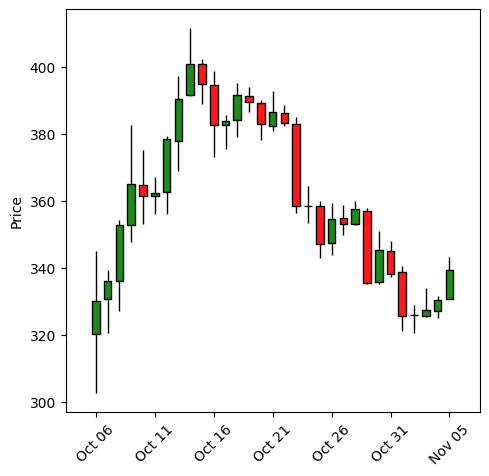

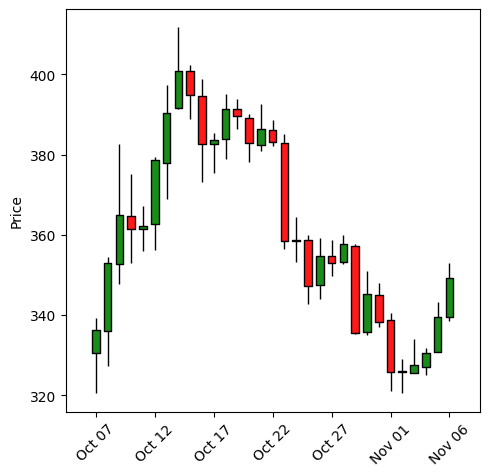

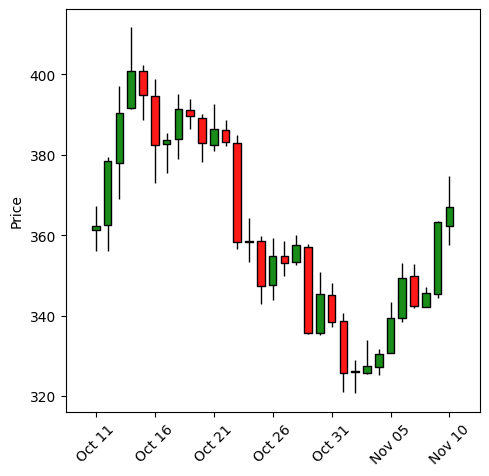

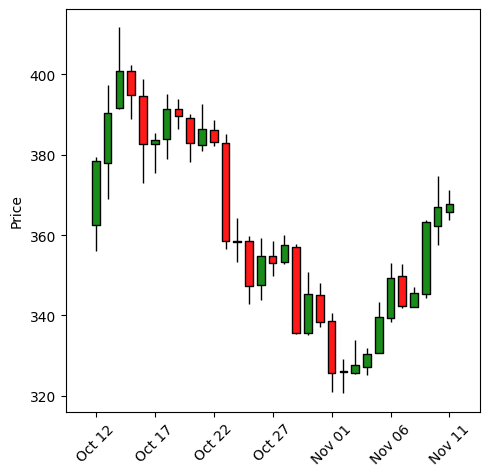

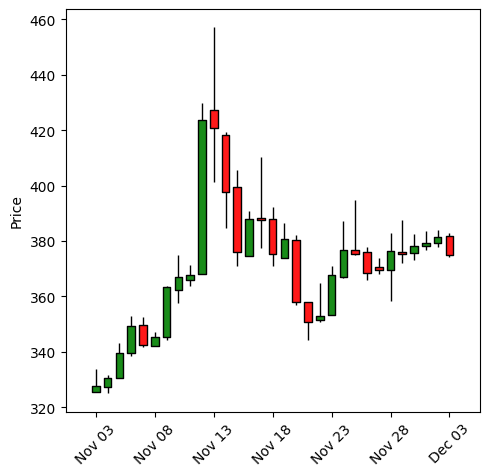

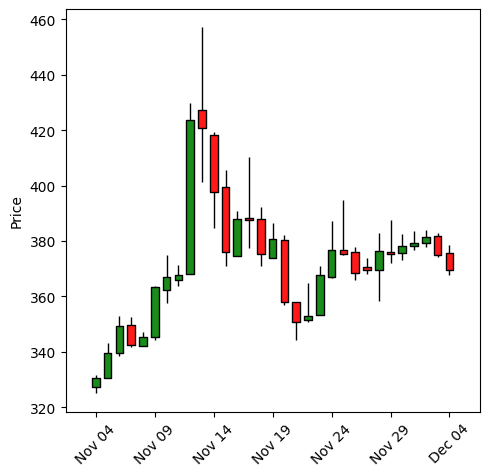

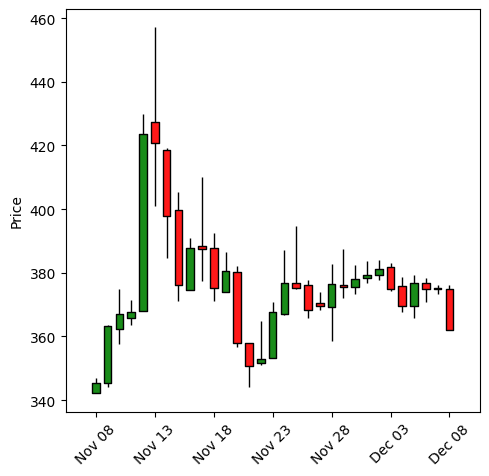

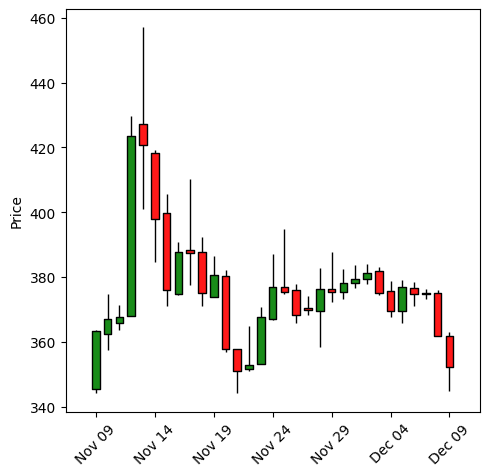

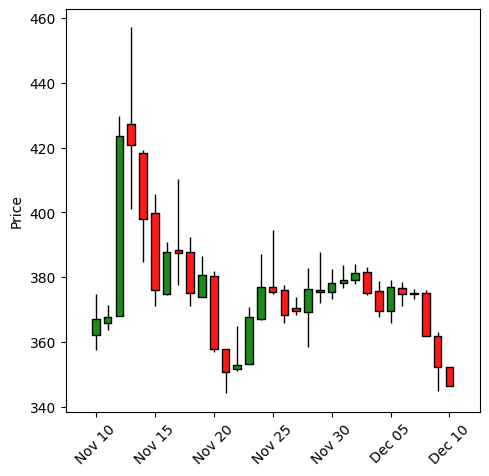

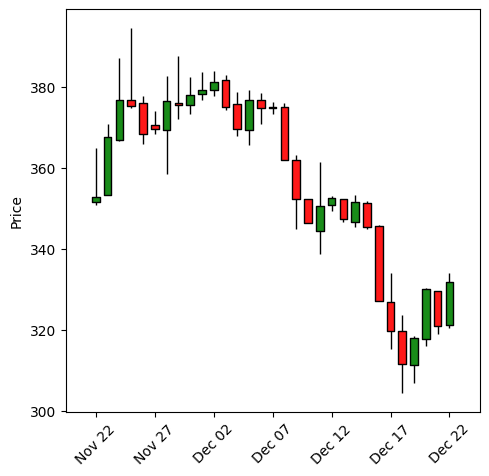

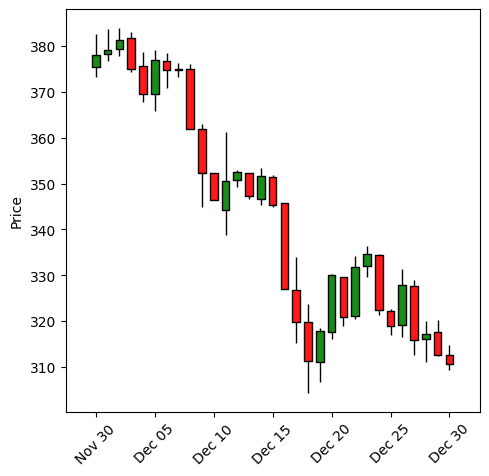

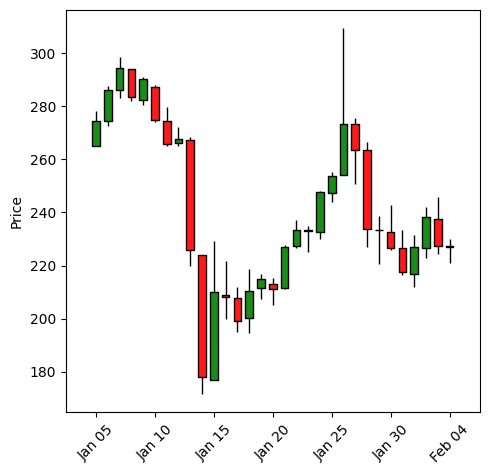

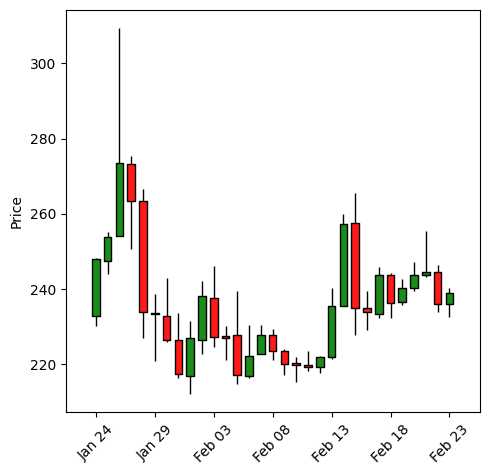

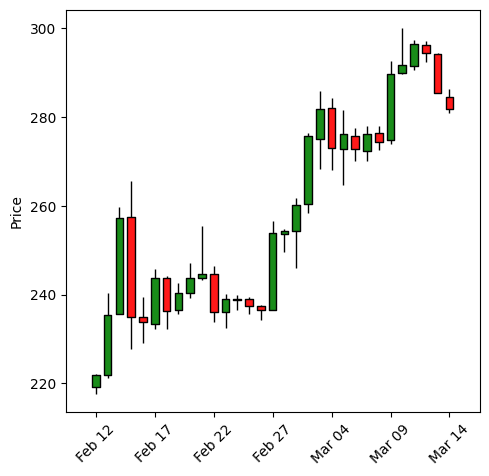

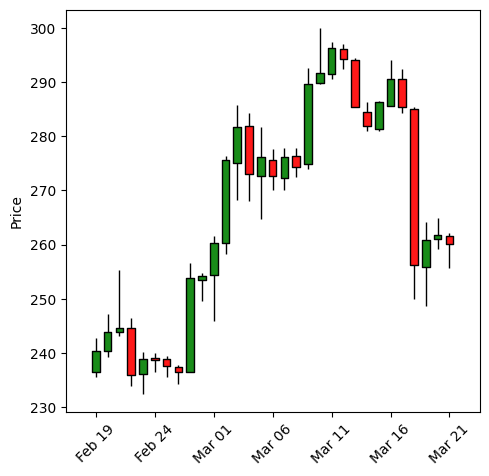

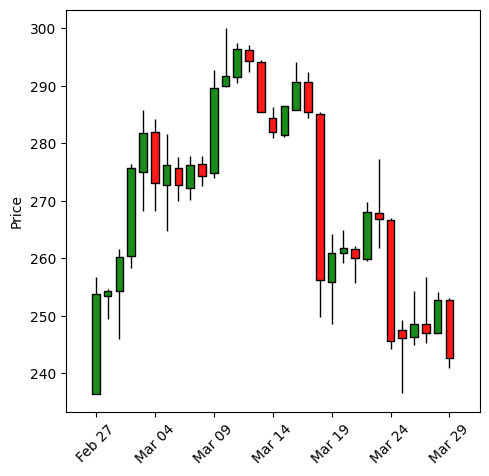

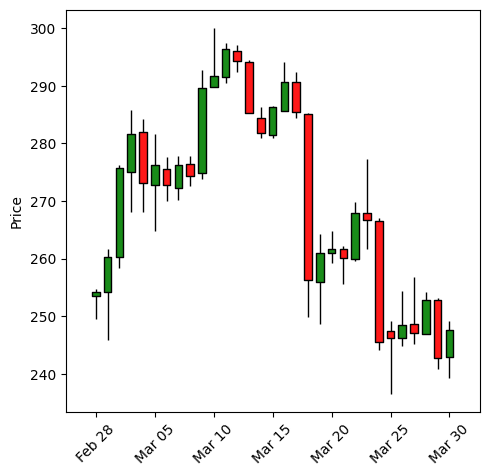

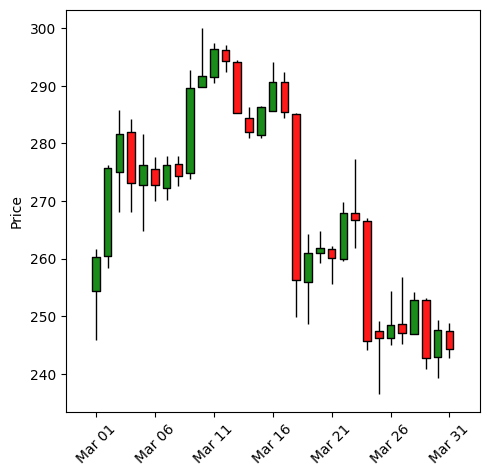

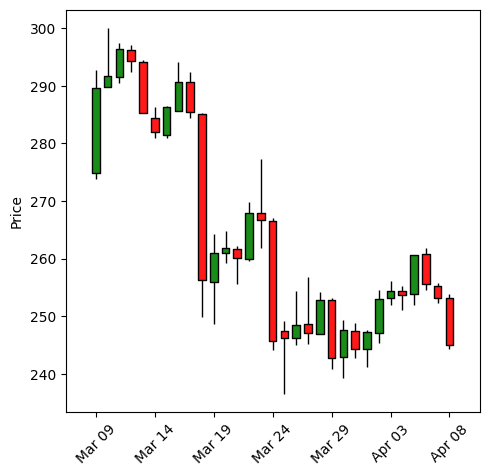

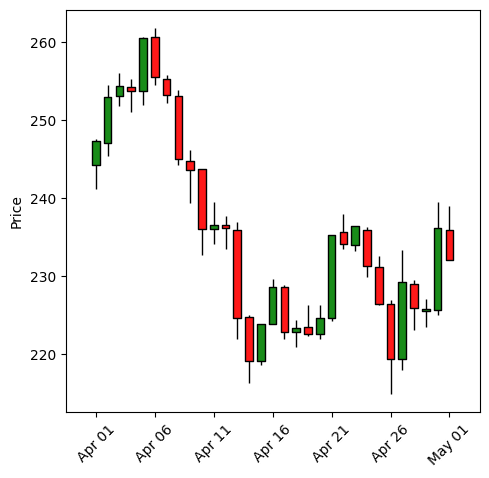

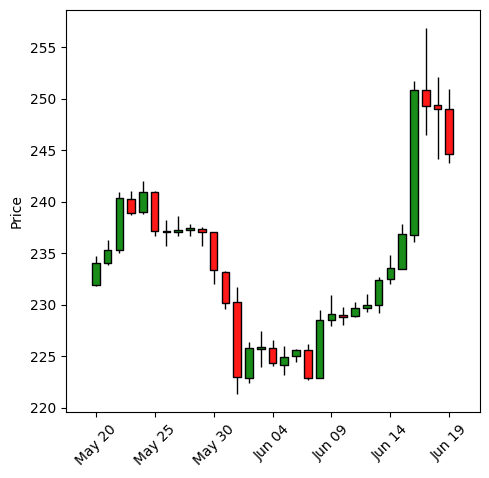

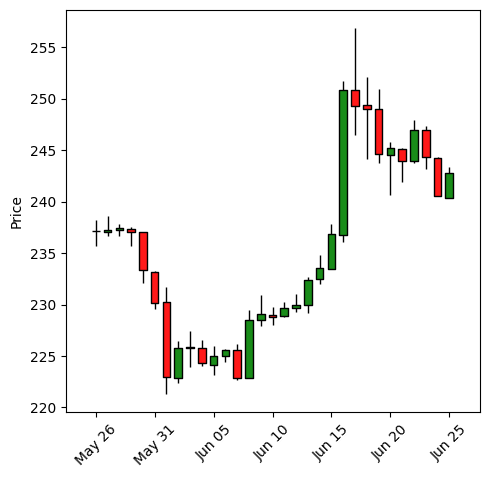

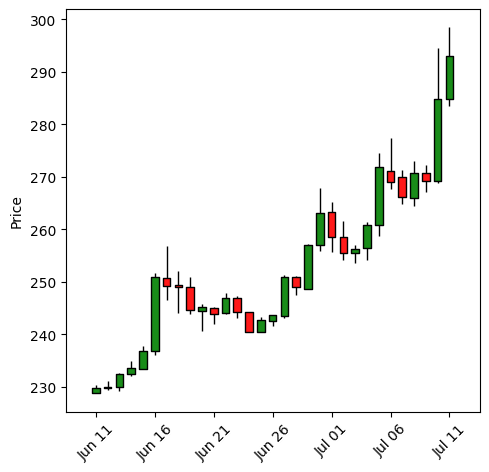

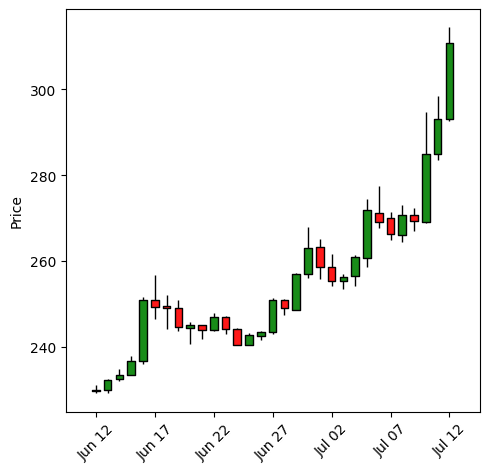

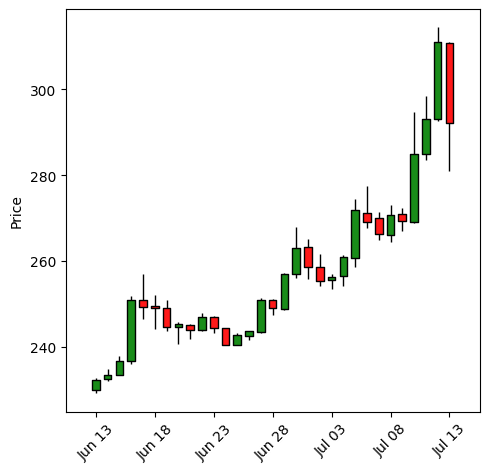

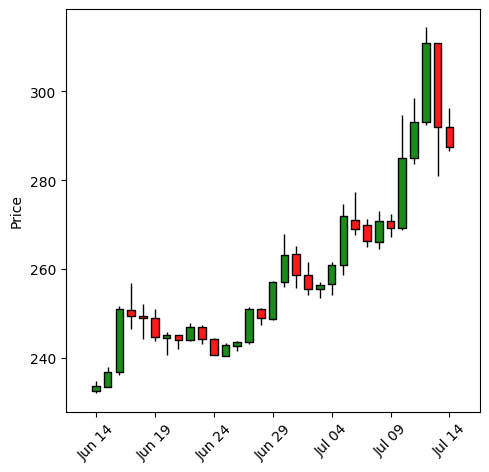

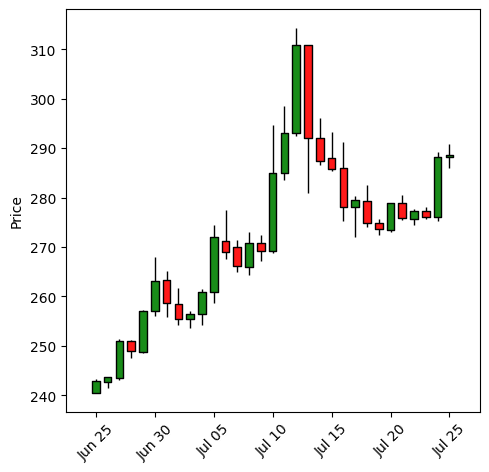

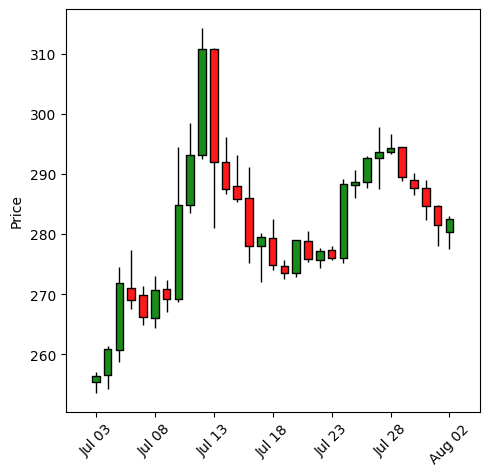

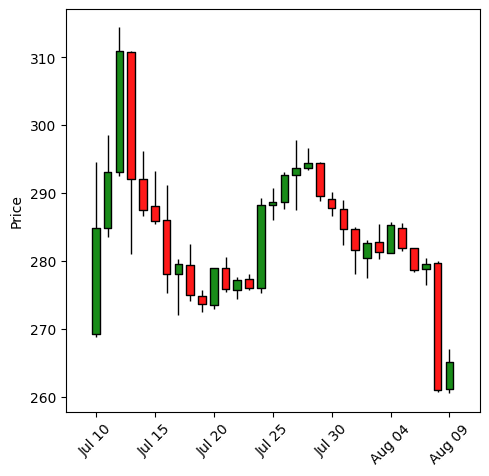

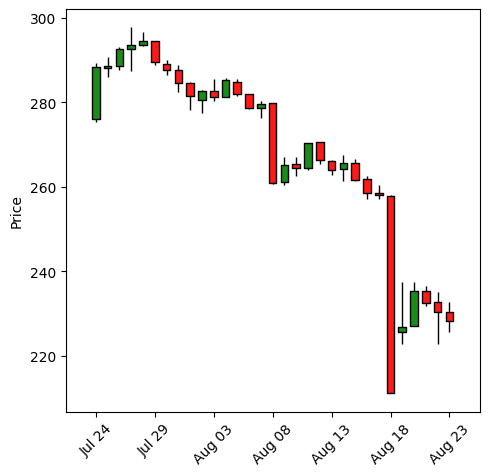

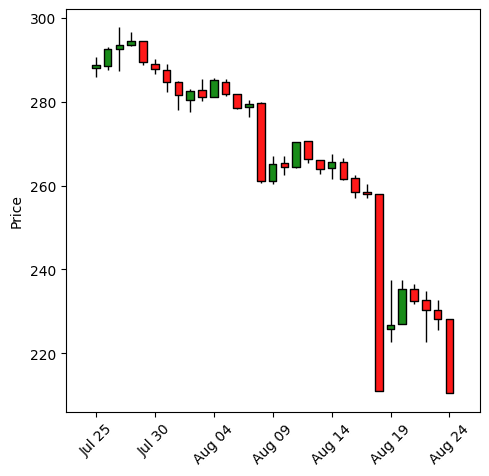

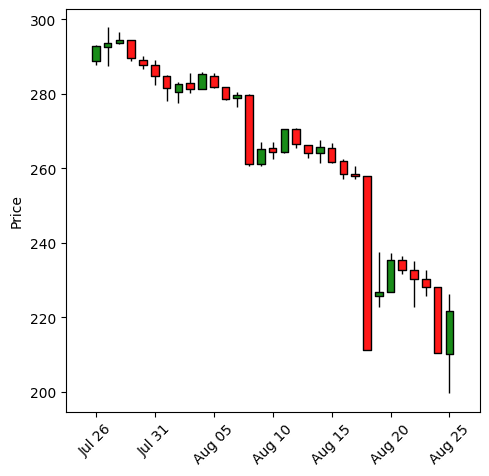

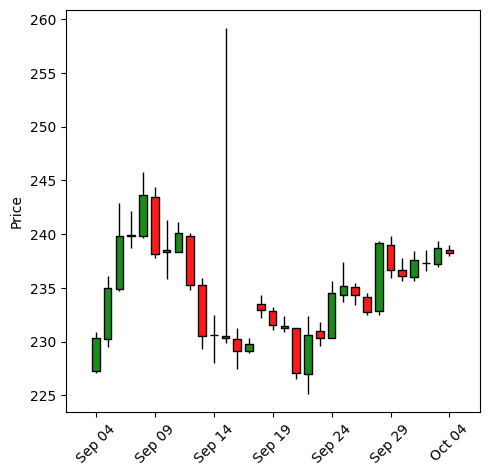

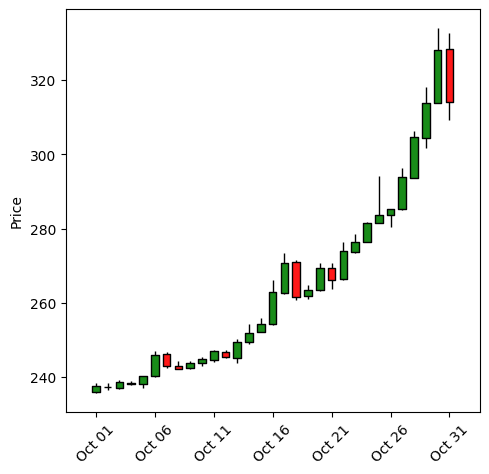

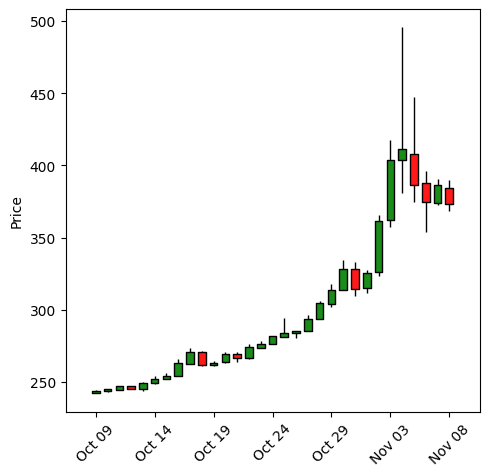

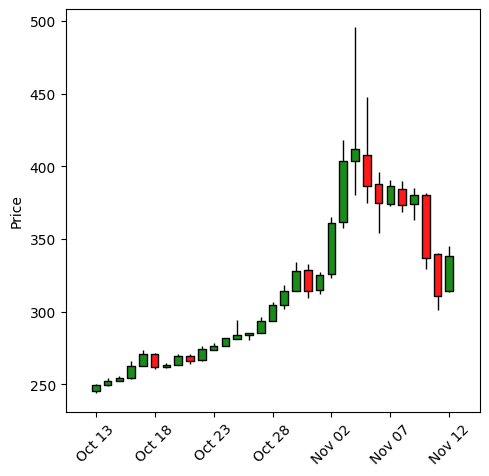

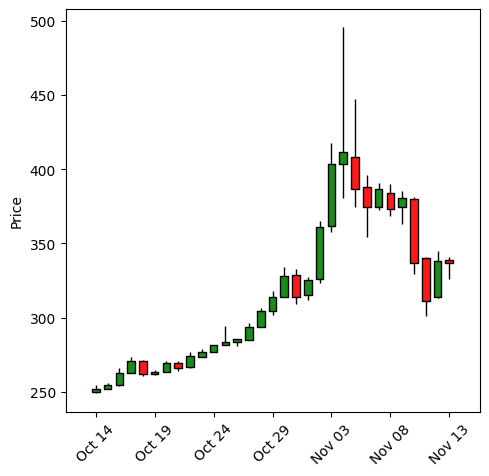

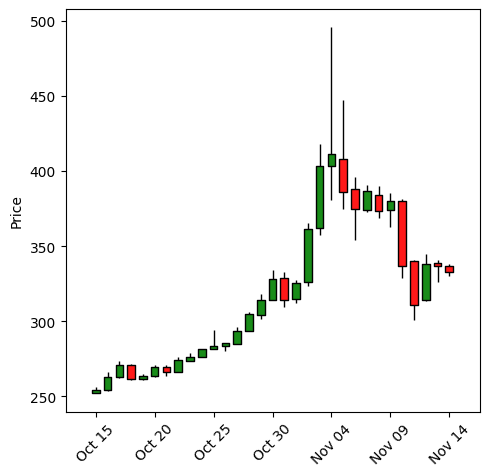

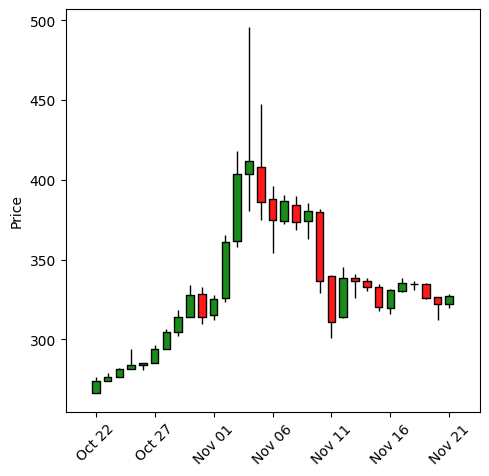

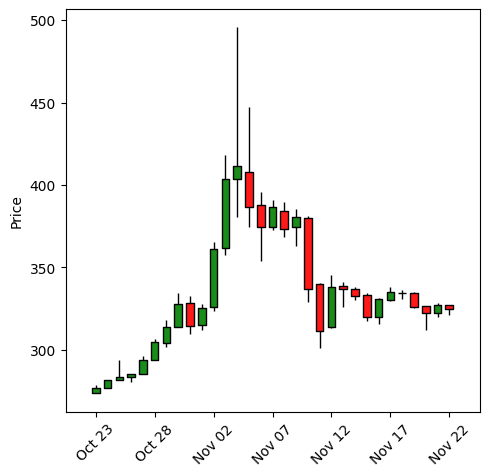

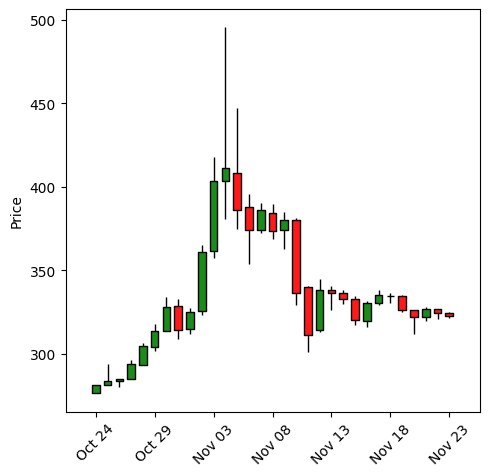

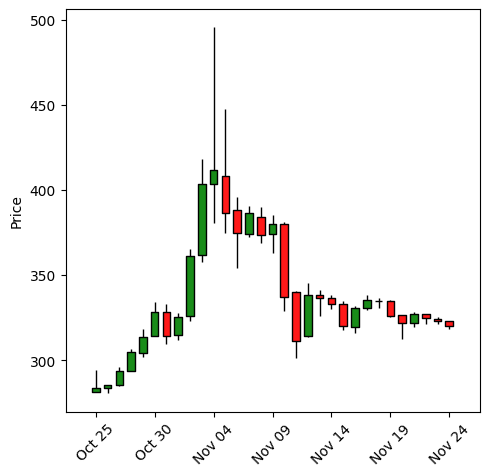

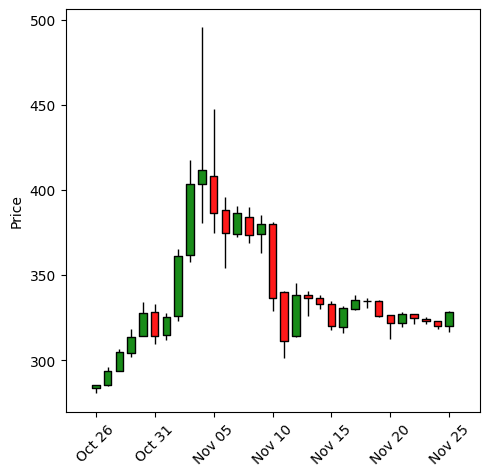

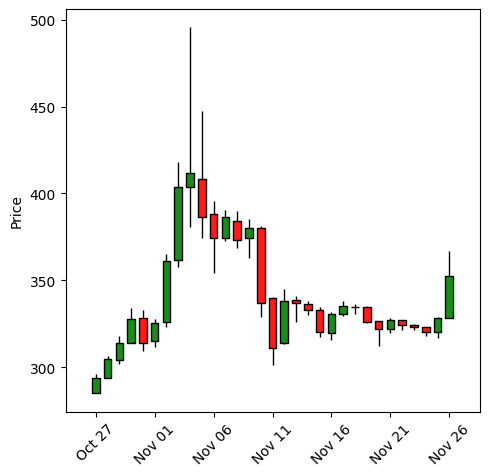

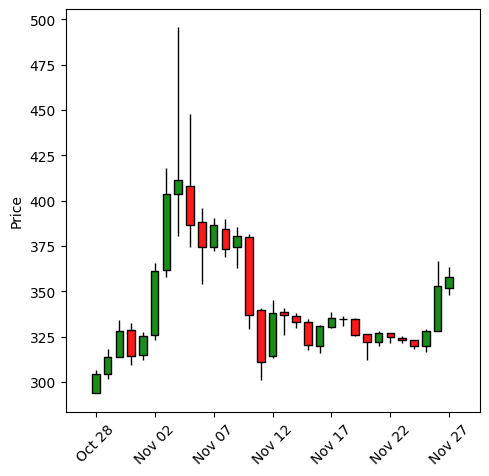

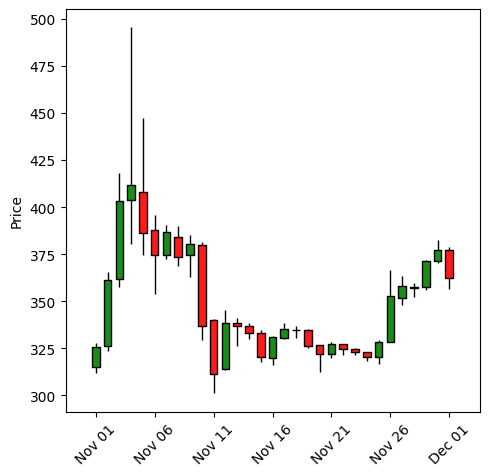

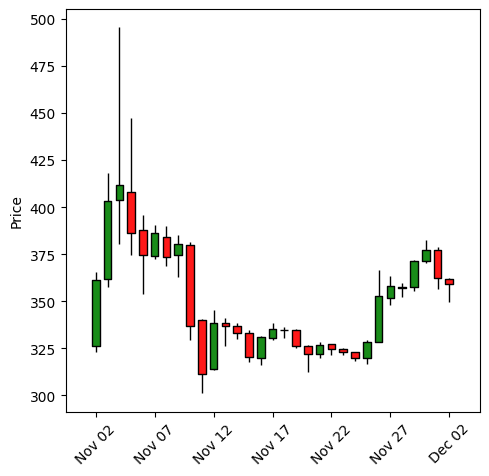

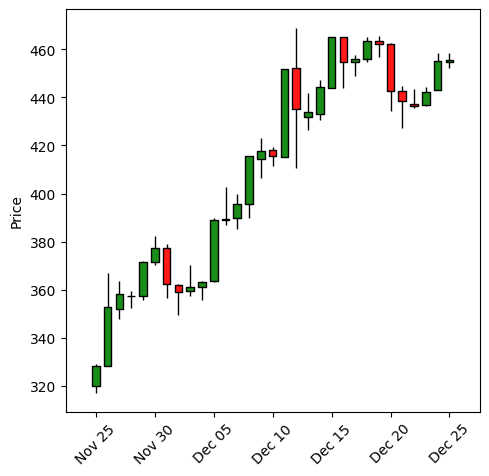

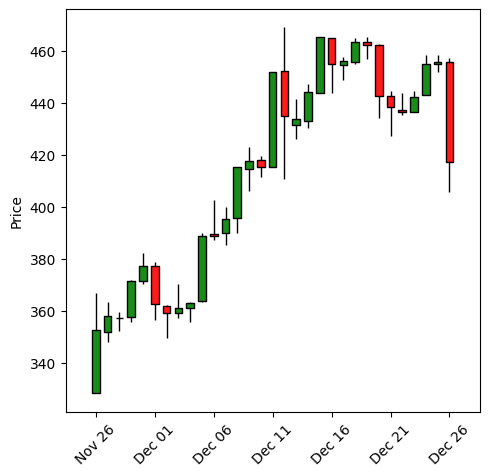

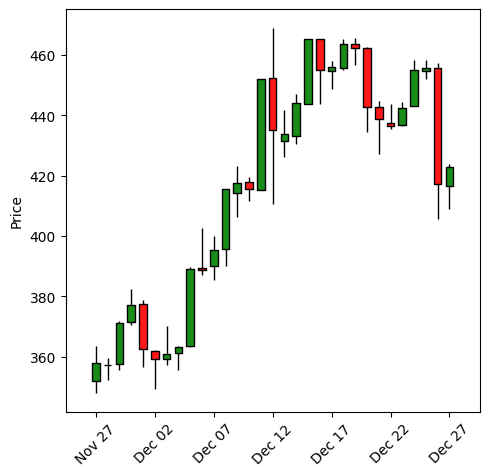

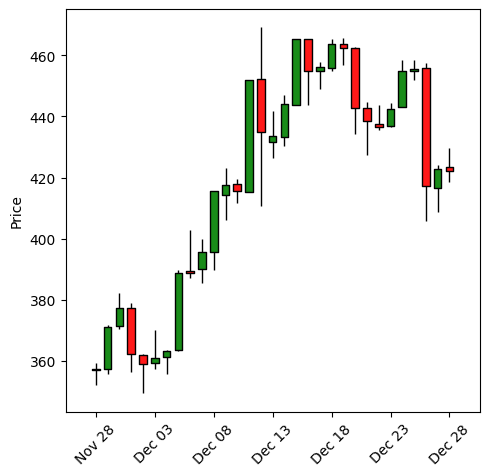

In [13]:
count = 0
for date in btc_stock_df_pandas[Date_normalized]:
    if count > 50:
        break
    draw_df_pandas = add_days_around_date(f"{date} 00:00:00+00:00", btc_df, 0, 30)
    draw_candle_image(draw_df_pandas, show_x_y=True, show_volume=False, show_macd=False, df_calculate_macd=btc_df)
    count += 1